<a href="https://colab.research.google.com/github/19pa1a0431/ai/blob/master/Copy_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression
==========

This notebook is a demo on implementing Linear Regression using sk-learn. We will be using a housing datset to train our model and make the predicitions.

Regression deals with a subset of machine learning approaches, that are generally used for predicting a continous output. It can be thought of as directly searching for a set of parameters that maximize the performance of a particular prediction model.

A simple line equation with slope $\omega_1$ and intercept $\omega_0$ is given by
                               
\begin{equation*}
\ y = \omega_1 x +\omega_0 \
\end{equation*}

This equation represents the relation between two variables, namely $x$ and $y$. Our goal is to find the weight values (\omega_1 and \omega_0) that maximise the performance i.e  the weight values that allows us best predict $y$ for a given $x$

#### Load the dataset

In [0]:
import pandas as pd # pandas is used for loading data from different files like csv, excel sheets etc
import numpy as np # numpy is used for dealing with arrays
from sklearn.model_selection import train_test_split # sklearn is used for creating models
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #matplotlib is used for visualising the data

# %matplotlib inline # since we want all the figures to be displayed in the notebook itself we pass this parameter
# %config InlineBackend.figure_format = 'retina' 

In [2]:
!wget https://gist.github.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv

--2020-02-27 10:13:56--  https://gist.github.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv
Resolving gist.github.com (gist.github.com)... 192.30.253.118
Connecting to gist.github.com (gist.github.com)|192.30.253.118|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv [following]
--2020-02-27 10:13:56--  https://gist.githubusercontent.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2022817 (1.9M) [text/plain]


In [3]:
!ls

housing_data.csv  sample_data


In [0]:
# load the data from a csv file
data = pd.read_csv('housing_data.csv')

#### Look at the data

In [6]:
data.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
# head is used to display first n entries of the data frame
data[["sqft_living","price"]].head(10)

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1225000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


#### Univariate Linear Regression

In [0]:
# sklearn expects arrays as input for building the model
X = np.array(data['sqft_living'])
y = np.array(data['price'])

In [0]:
# we a need a test set to measure the performance of our model. 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Text(0,0.5,'price')

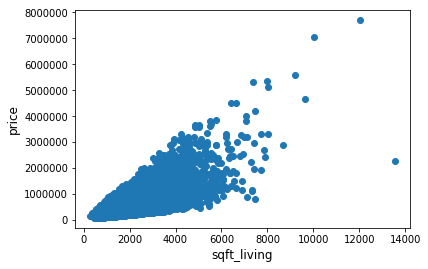

In [15]:
plt.scatter(data['sqft_living'],data['price'])
plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

In [0]:
# X_train is a 1-d array, since skleanr expects 2-d array as input, we are changing the dimension.
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
regr.coef_

array([283.38900258])

In [26]:
regr.intercept_

-50349.03054891748

In [25]:
# training error
regr.score(X_train, y_train)

0.49242540369955873

In [21]:
# testing error
regr.score(X_test, y_test)

0.5005114458347968

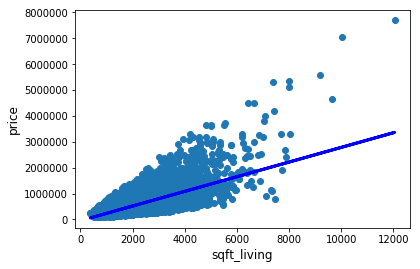

In [27]:
# Plot predictions on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.predict(X_train), color='blue',
         linewidth=3)

plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

plt.show()

In [28]:
regr.predict(np.array([[2000]]))

array([516428.97460283])

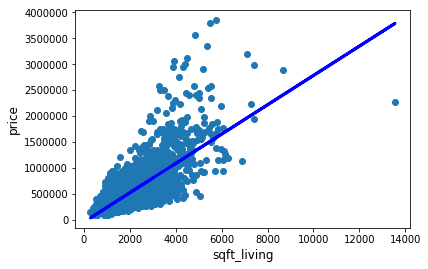

In [29]:
# Plot predictions on testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

plt.show()

##### Exercise: Try implementing Univariate Linear Regression with other variables. 

In [0]:
# Your code starts here

#### Exercise: Multivariate Linear Regression

In [0]:
# Your code starts here
